In [2]:
import pandas as pd
df_Imdb = pd.read_csv('../Assets/IMDB Dataset.csv')

In [3]:
df_Imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Predictor (Independent Variable) = Review </br>
Target (Dependent Variable) = Sentiment

In [8]:
# take a sample of 10000 rows to make processing faster

# get 9000 positive
df_positive = df_Imdb[df_Imdb['sentiment'] == 'positive'][:9000]

In [9]:
# get 1000 negative rows
df_negative = df_Imdb[df_Imdb['sentiment'] == 'negative'][:1000]

In [11]:
# concatenate vertically
df_reviews_imb = pd.concat([df_positive, df_negative])

In [13]:
# (imb = imbalance , unequal number of samples per class, not equally distributed)
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

## Undersampling and Oversampling
are the solutions for the imbalance data

#### Undersampling
Deleting samples from the majority of the class, to get the same number of positive and negative reviews we have to delete the data  from the majority class

#### Oversampling
Increase the number of observations of the minority class, so we have to duplicate the samples of the minority class

<Axes: xlabel='sentiment'>

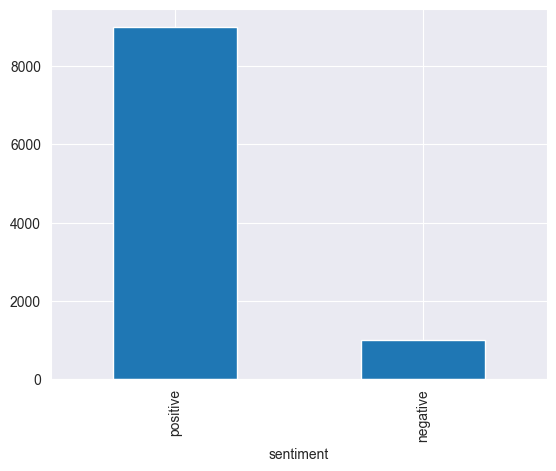

In [14]:
# Dealing with Imbalanced data
df_reviews_imb.value_counts('sentiment').plot(kind='bar')

### Undersample

method 01 - using .sample()

In [15]:
# Balancing data with .sample()
length_negative = len(df_reviews_imb[df_reviews_imb['sentiment']=='negative'])

In [18]:
df_reviews_positive = df_reviews_imb[df_reviews_imb['sentiment']=='positive'].sample(n=length_negative)

In [19]:
df_reviews_positive

,review,sentiment
17019,We viewed the vcr and found it to be fascinati...,positive
13242,"The inspiration for the ""Naked Gun"" movies cas...",positive
11546,"Renoir's tale of Paris,the Cancan,a washer-gir...",positive
3475,When the Grinch came out I was excited though ...,positive
2851,"David Cronenberg, much like colleague David Ly...",positive
...,...,...
1234,The 20th animated Disney classic is often crit...,positive
6978,'Ray' lives on<br /><br />Ray Dir- Taylor Hack...,positive
15733,"Better than it has any right to be, this movie...",positive
2107,In order to stop her homosexual friend Albert ...,positive


In [20]:
df_reviews_negative = df_reviews_imb[df_reviews_imb['sentiment']=='negative']

In [21]:
df_reviews_negative

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [25]:
pd.concat([df_reviews_positive, df_reviews_negative]).value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

In [28]:
df_reviews_bal = pd.concat([df_reviews_positive, df_reviews_negative])

In [29]:
df_reviews_bal

,review,sentiment
17019,We viewed the vcr and found it to be fascinati...,positive
13242,"The inspiration for the ""Naked Gun"" movies cas...",positive
11546,"Renoir's tale of Paris,the Cancan,a washer-gir...",positive
3475,When the Grinch came out I was excited though ...,positive
2851,"David Cronenberg, much like colleague David Ly...",positive
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [40]:
# sort and reset index
df_reviews_bal.reset_index(drop=True, inplace=True)

In [41]:
df_reviews_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,Knute Rockne led an extraordinary life and his...,positive
1996,At the height of the 'Celebrity Big Brother' r...,positive
1997,This is another of Robert Altman's underrated ...,positive
1998,This movie won a special award at Cannes for i...,positive


Method 02 - Balancing data with RandomUnderSampler

In [ ]:
!pip install imblearn

#### # Import RandomOverSampler and do the same for over Sampling


In [36]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
# create instance of random under sampler

##### rus.fit_resample(x,y)
 x - represent the data which has to be sampled </br>
 y - correspond(match) labels for each samples in x

In [37]:
# x - 2D array / unbalance data set , using [[]] return a data set
# y - 1D array / series , [''] return a series
rus.fit_resample(df_reviews_imb[['review']],df_reviews_imb['sentiment'])

# here we get 2 outputs first one is a df with a one column and 2 one is a series

(                                                  review
 3      Basically there's a family where a little boy ...
 7      This show was an amazing, fresh & innovative i...
 8      Encouraged by the positive comments about this...
 10     Phil the Alien is one of those quirky films wh...
 11     I saw this movie when I was about 12 when it c...
 ...                                                  ...
 10833  Knute Rockne led an extraordinary life and his...
 1039   At the height of the 'Celebrity Big Brother' r...
 5255   This is another of Robert Altman's underrated ...
 12237  This movie won a special award at Cannes for i...
 15014  You'd be forgiven to think a Finnish director ...
 
 [2000 rows x 1 columns],
 3        negative
 7        negative
 8        negative
 10       negative
 11       negative
            ...   
 10833    positive
 1039     positive
 5255     positive
 12237    positive
 15014    positive
 Name: sentiment, Length: 2000, dtype: object)

In [43]:
df_reviews_bal2, df_reviews_bal2['sentiment'] = rus.fit_resample(df_reviews_imb[['review']],df_reviews_imb['sentiment'])

In [46]:
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

In [45]:
df_reviews_bal2.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

## Splitting data into train and test

In [48]:
# import train_test_split
from sklearn.model_selection import train_test_split


In [49]:
# create train ans test variables
train,test = train_test_split(df_reviews_bal,test_size=0.33,random_state=42)

,review,sentiment
81,"I just got back from this free screening, and ...",negative
915,Claire Denis's movies seem to fall into one of...,negative
1018,"One must admit, that Dev has an eye for beauty...",positive
380,Mario Lewis of the Competitive Enterprise Inst...,negative
1029,"The first, and far better, of Kevin Kline's tw...",positive
...,...,...
1130,I saw the movie in Izmir as the closing film o...,positive
1294,This is a great documentary and above comments...,positive
860,"Obviously, the comments above that fawn over t...",negative
1459,Robert Carlyle excels again. The period was ca...,positive


In [51]:
# train 60& and test 30%(0.33)
train

,review,sentiment
81,"I just got back from this free screening, and ...",negative
915,Claire Denis's movies seem to fall into one of...,negative
1018,"One must admit, that Dev has an eye for beauty...",positive
380,Mario Lewis of the Competitive Enterprise Inst...,negative
1029,"The first, and far better, of Kevin Kline's tw...",positive
...,...,...
1130,I saw the movie in Izmir as the closing film o...,positive
1294,This is a great documentary and above comments...,positive
860,"Obviously, the comments above that fawn over t...",negative
1459,Robert Carlyle excels again. The period was ca...,positive


In [50]:
test

,review,sentiment
1860,Refreshing `lost' gem! Featuring effective dia...,positive
353,Never saw the original movie in the series...I...,negative
1333,"Once upon a time, in Sweden, there was a poor ...",positive
905,"At the beginning of the film, you might double...",negative
1289,Another Spanish movie about the 1936 Civil War...,positive
...,...,...
118,"I have seen most, if not all of the Laurel & H...",negative
1249,D.W. Griffith could have made any film he want...,positive
1993,"Cardiff, Wales. A bunch of 5 mates are deeply ...",positive
522,I rented this movie with my friend for a good ...,negative


In [52]:
train_x , train_y = train['review'],train['sentiment']

In [53]:
test_x , test_y = test['review'],test['sentiment']
